In [4]:
# Load dataset
from google.colab import files
upload = files.upload()
df = pd.read_csv("boston.csv")
df.head()


Saving boston.csv to boston (3).csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
X= df.drop("MEDV",axis =1)
y =df['MEDV']
scaler = StandardScaler()
X = scaler.fit_transform(X)
#spliting data for test
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=48)
#MSE or loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
class LinearRegression:
    def __init__(self, learning_rate=0.01, iters=1200):
        self.learning_rate = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = -(2/n_samples) * np.dot(X.T, (y - y_predicted))
            db = -(2/n_samples) * np.sum(y - y_predicted)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
myModel = LinearRegression(learning_rate = 0.01,iters =1200)
myModel.fit(X_train,y_train)
y_predic = myModel.predict(X_test)
mse(y_test,y_predic)
print('\n')
rmse = np.sqrt(mean_squared_error(y_test,y_predic))
print(rmse)
print('\n')
r2 = r2_score(y_test,y_predic)
print("RMSE :",rmse)
print('R2 score :',r2)




5.588508390547093


RMSE : 5.588508390547093
R2 score : 0.6552479352489362


#**Now from RandomForestRegression**

In [17]:
# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=120, max_depth=10, random_state=48)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate from builten method
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R² Score:", rf_r2)


Random Forest RMSE: 3.8540925109195725
Random Forest R² Score: 0.8360319125030042


# **From  XBG regressor**

In [21]:
# Initialize and train model
xgb_model = XGBRegressor(n_estimators=120, learning_rate=0.2, max_depth=6, random_state=48)
xgb_model.fit(X_train, y_train)

# Predicition
xgb_predictions = xgb_model.predict(X_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R² Score:", xgb_r2)


XGBoost RMSE: 3.7017347772222258
XGBoost R² Score: 0.8487394554878269


# **Models Comparision**

In [24]:
print("\n-----------------------------Model Comparison -----------------------------")
print("Linear Regression RMSE:", rmse, "| R²:", r2)
print("Random Forest RMSE:", rf_rmse, "| R²:", rf_r2)
print("XGBoost RMSE:", xgb_rmse, "| R²:", xgb_r2)



-----------------------------Model Comparison -----------------------------
Linear Regression RMSE: 5.588508390547093 | R²: 0.6552479352489362
Random Forest RMSE: 3.8540925109195725 | R²: 0.8360319125030042
XGBoost RMSE: 3.7017347772222258 | R²: 0.8487394554878269


# **Ploting**

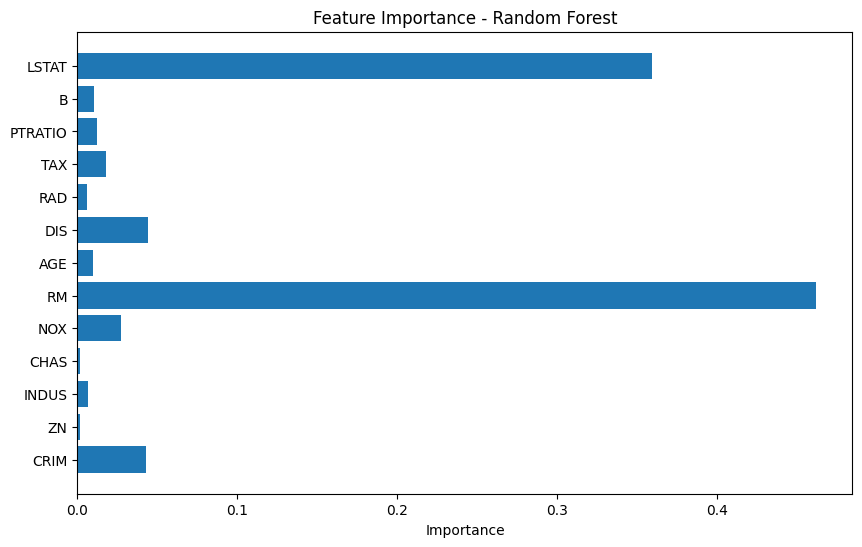

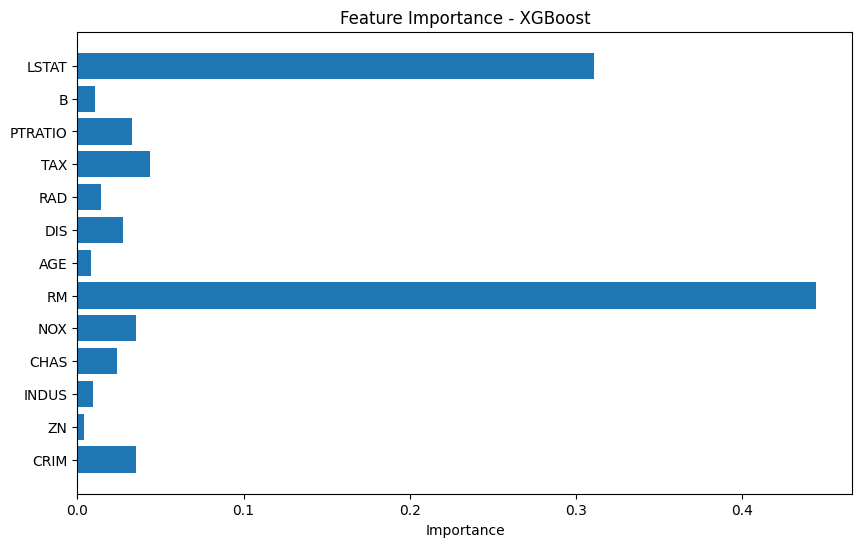

In [26]:
# Random Forest Feature Importance
importances_rf = rf_model.feature_importances_
features = df.drop("MEDV", axis=1).columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances_rf)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()
# XGBoost Feature Importance
importances_xgb = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, importances_xgb)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.show()
